In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Dataset: Control and Test Group Classification

In [2]:
df_exp = pd.read_csv('data/raw/df_final_experiment_clients.txt')
df_exp.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [3]:
df_exp.shape

(70609, 2)

## Data Cleaning

In [4]:
# Check for null values
df_exp.isna().sum() # Around 1/3 of the data has no information on the variation

client_id        0
Variation    20109
dtype: int64

In [5]:
# Drop these rows since these clients have no further usability
df_exp.dropna(inplace = True)

In [6]:
# Test for duplicates
print(df_exp['client_id'].duplicated().sum()) # no duplicates in client_id

0


## Data Visualization

In [7]:
# Size of control and test groups
grouped = df_exp.groupby('Variation')
print(grouped.get_group('Test').shape)
print(grouped.get_group('Control').shape) # --> almost equally sized

(26968, 2)
(23532, 2)


# Dataset: Experiment Roster

In [8]:
df_demo = pd.read_csv('data/raw/df_final_demo.txt')
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [9]:
df_demo.shape

(70609, 9)

In [10]:
df_demo.dtypes # everything is ok

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

# Data Cleaning

In [11]:
df_demo.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [12]:
# Rename the columns for understandability
replacements = {'clnt_tenure_yr': 'client_tenure_year', 
                'clnt_tenure_mnth': 'client_tenure_month', 
                'clnt_age': 'client_age', 
                'gendr': 'gender',
                'num_accts': 'account_number', 
                'bal': 'balance', 
                'calls_6_mnth': 'calls_6_months', 
                'logons_6_mnth': 'logons_6_months'}
df_demo.rename(columns= replacements, inplace=True)

**clnt_tenure_yr:** Represents how long the client has been with Vanguard, measured in years.

**clnt_tenure_mnth:** Further breaks down the client’s tenure with Vanguard in months.

**clnt_age:** Indicates the age of the client.

**gendr:** Specifies the client’s gender.

**num_accts:** Denotes the number of accounts the client holds with Vanguard.

**bal:** Gives the total balance spread across all accounts for a particular client.

**calls_6_mnth:** Records the number of times the client reached out over a call in the past six months.

**logons_6_mnth:** Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

In [13]:
# Check for null values
df_demo.isna().sum()

client_id               0
client_tenure_year     14
client_tenure_month    14
client_age             15
gender                 14
account_number         14
balance                14
calls_6_months         14
logons_6_months        14
dtype: int64

In [14]:
df_demo.dropna(inplace = True)

In [15]:
df_demo.shape # dropped 15 rows

(70594, 9)

In [16]:
# Test for duplicates
print(df_exp['client_id'].duplicated().sum()) # no duplicates

0


# Categorical Variables

**Gender**

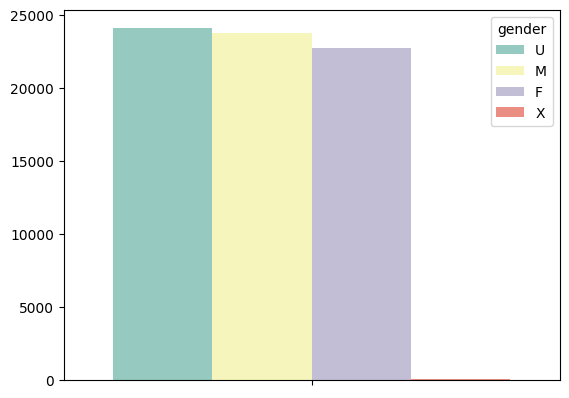

In [17]:
gt = df_demo['gender'].value_counts()
sns.barplot(hue = gt.index, y = gt.values, palette="Set3");

# Numerical Variables

In [18]:
# Get the mean, median and std of the numerical values in one table (client_id doesn't make sense here)
df_demo.select_dtypes('number').describe()

,client_id,client_tenure_year,client_tenure_month,client_age,account_number,balance,calls_6_months,logons_6_months
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


*Who are the primary clients using this online process?*

The "average" (actually median) client has a tenure of 11 years, is 47 years old, has 2 accounts, has called 3 times, and has logged in 5 times in the last 6 months. The average account balance is 140,000; 50 procent of clients have an account balance below and 50 procent above 63,000.

**Client Tenure**

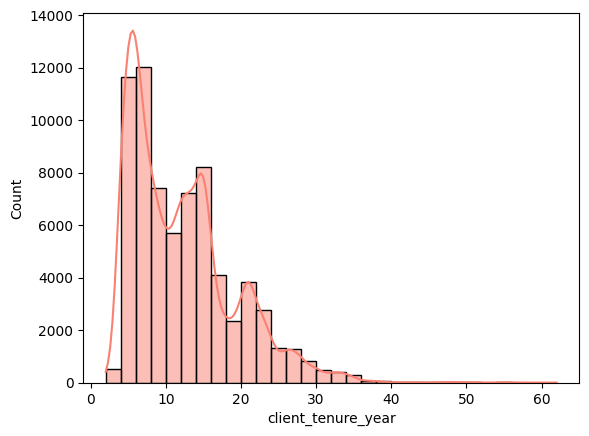

In [19]:
sns.histplot(df_demo['client_tenure_year'], kde = True, bins = 30, color = "salmon");

The histogram reveals that there are two peaks in the tenure of clients, which lie at 5 and 15 years.

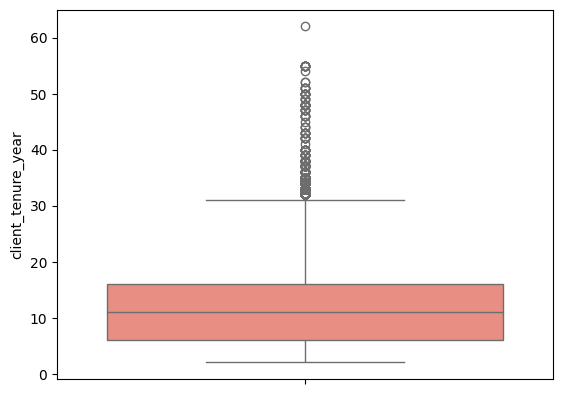

In [20]:
sns.boxplot(data = df_demo['client_tenure_year'], color = 'salmon');

The boxplot shows that there are a lot of upper outliers, indicating that there are a few clients that have been with Vanguard for even 40 to 60 years.

In [21]:
print(df_demo['client_tenure_year'].skew()) 
print(df_demo['client_tenure_year'].kurtosis())

1.0366247018480386
1.0709232170805043


The positive skew value illustrates that the distribution is asymmetric and right-skewed.

The kurtosis value (< 3) illustrates that the age distribution has lighter tails and a heaver peak than the normal distribution.

**Client Age**

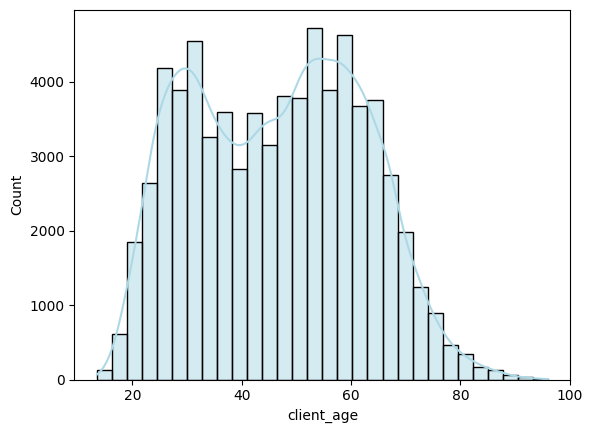

In [22]:
sns.histplot(df_demo['client_age'], kde = True, bins = 30, color = "lightblue");

The histogram reveals that there are two peaks in the districution, which lie at 30 and 60 years.

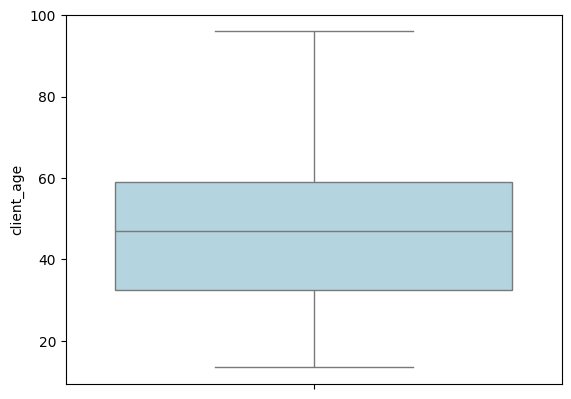

In [23]:
sns.boxplot(data = df_demo['client_age'], color = 'lightblue');

The box plot shows that there are no outliers.

In [24]:
print(df_demo['client_age'].skew()) 
print(df_demo['client_age'].kurtosis())

0.08182349158703761
-0.9271048487356293


The almost zero skew value illustrates that the distribution is almost not skewed, and highly symmetric.

The extremely small kurtosis value (< 3) illustrates that the age distribution has way lighter tails and a way heaver peak than the normal distribution.

# Dataset Classification Split

In [25]:
# Group by variation group
df_control = df_exp.groupby('Variation').get_group('Control').sort_values(by = 'client_id')
df_test = df_exp.groupby('Variation').get_group('Test').sort_values(by = 'client_id')

In [26]:
# Drop variation column
df_control = df_control.drop('Variation', axis = 1)
df_test = df_test.drop('Variation', axis = 1)

In [27]:
df_control.reset_index(inplace = True, drop = True)
df_test.reset_index(inplace = True, drop = True)

In [28]:
df_control.head()

,client_id
0,1028
1,1104
2,1186
3,1195
4,1197


In [29]:
df_test.head()

,client_id
0,555
1,647
2,934
3,1336
4,1346


In [30]:
df_test.to_csv('data/clean/client_id_test.csv', index=False)
df_test.to_csv('data/clean/client_id_control.csv', index=False)

# Dataset Classification and Experiment Roster Merge

In [49]:
df_tot = pd.merge(df_exp, df_demo, on = 'client_id', how = 'inner')
df_tot.head()

,client_id,Variation,client_tenure_year,client_tenure_month,client_age,gender,account_number,balance,calls_6_months,logons_6_months
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0


In [50]:
df_tot.shape

(50487, 10)

In [51]:
df_tot.isna().sum()

client_id              0
Variation              0
client_tenure_year     0
client_tenure_month    0
client_age             0
gender                 0
account_number         0
balance                0
calls_6_months         0
logons_6_months        0
dtype: int64

In [52]:
df_tot.to_csv('data/clean/total_client_info.csv', index=False)